In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [1]:
from sqlalchemy import create_engine


server = "ADNANKHADER\\SQLEXPRESS"
database = "MyDatabase"

connection_string = (
    f"mssql+pyodbc://@{server}/{database}"
    "?driver=ODBC+Driver+17+for+SQL+Server"
    "&trusted_connection=yes"
)

engine = create_engine(connection_string)


In [2]:
test_query = "select top 5 * from gold.fact_sales"
cdf = pd.read_sql(test_query, engine)

cdf


C:\Users\Adnan Khader\anaconda3\lib\site-packages\pandas\io\sql.py:1762: SAWarning: Unrecognized server version info '17.0.1000.7'.  Some SQL Server features may not function properly.
  insp = inspect(self.connectable)


,order_id,date_key,product_key,location_key,ship_mode_key,segment_key,quantity,selling_price,discount_amount,total_revenue,total_profit,profit_loss_flag,order_value_bucket
0,1,425,48,385,4,1,2,254.8,5.2,509.6,29.6,Profit,low
1,1,425,49,385,4,1,2,254.8,5.2,509.6,29.6,Profit,low
2,1,425,50,385,4,1,2,254.8,5.2,509.6,29.6,Profit,low
3,1,425,51,385,4,1,2,254.8,5.2,509.6,29.6,Profit,low
4,2,592,262,385,4,1,3,708.1,21.9,2124.3,324.3,Profit,low


### REVENUE & SALES PERFORMANCE

In [8]:
pd.options.display.float_format = '{:,.2f}'.format
query = "select * from sales_metrics"
cdf = pd.read_sql(query, engine)
cdf


,Measure,Measure_value
0,Total Revenue,"68,447,171.90"
1,Total customers,"50,039.00"
2,Total Quantity,"191,840.00"
3,Total Profit,"6,426,791.90"
4,Average Discount,9.82
5,Average Order Value,"1,367.88"


In [13]:
q='select order_year, order_month, round(sum(total_revenue),2) total_revenue, count(order_id) number_of_orders from gold.fact_sales s left join gold.dim_date d on d.date_key=s.date_key group by d.order_year,d.order_month_number,d.order_month order by order_year, order_month_number'
cdf = pd.read_sql(q, engine)
cdf

,order_year,order_month,total_revenue,number_of_orders
0,2022,January,"2,889,345.60",2242
1,2022,February,"2,969,516.40",2020
2,2022,March,"2,251,831.80",1968
3,2022,April,"2,891,542.70",2262
4,2022,May,"2,943,556.20",2078
5,2022,June,"2,525,245.20",1968
6,2022,July,"2,371,625.70",2143
7,2022,August,"3,338,972.70",2150
8,2022,September,"2,640,556.90",1867
9,2022,October,"3,556,891.30",2188


In [32]:
cdf['year_month']=+cdf['order_month'].str[0:3]+cdf['order_year'].astype(str).str[2:4]
cdf

,order_year,order_month,total_revenue,number_of_orders,year_month
0,2022,January,"2,889,345.60",2242,Jan22
1,2022,February,"2,969,516.40",2020,Feb22
2,2022,March,"2,251,831.80",1968,Mar22
3,2022,April,"2,891,542.70",2262,Apr22
4,2022,May,"2,943,556.20",2078,May22
5,2022,June,"2,525,245.20",1968,Jun22
6,2022,July,"2,371,625.70",2143,Jul22
7,2022,August,"3,338,972.70",2150,Aug22
8,2022,September,"2,640,556.90",1867,Sep22
9,2022,October,"3,556,891.30",2188,Oct22


<AxesSubplot:xlabel='year_month', ylabel='total_revenue'>

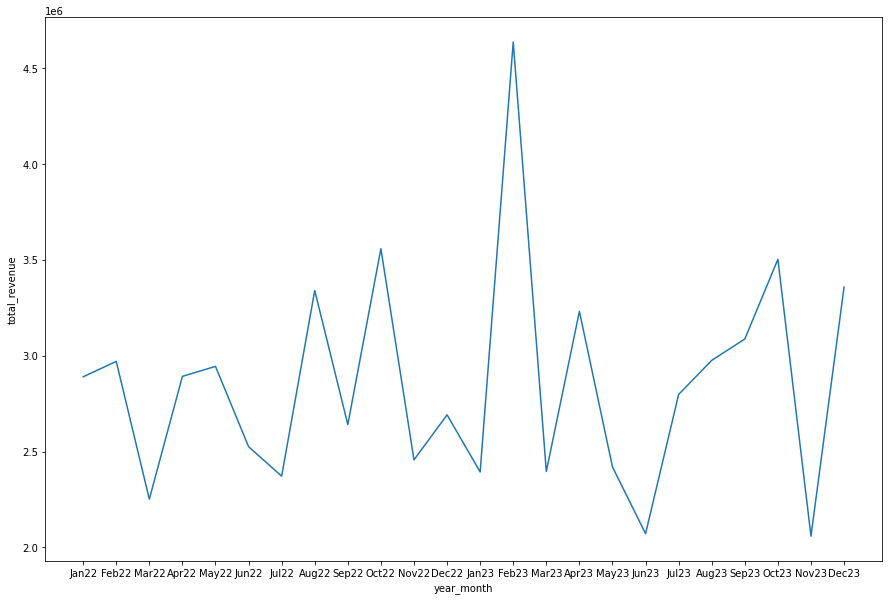

In [33]:
plt.figure(figsize=(15,10))
sns.lineplot(x='year_month', y='total_revenue', data=cdf)

In [35]:
q="""with sum_revenue as (
    select
        d.order_year,
        d.order_month,
        d.order_month_number,
        sum(s.total_revenue) as revenue
    from gold.fact_sales s
    join gold.dim_date d
        on d.date_key = s.date_key
    group by
        d.order_year,
        d.order_month,
        d.order_month_number
)
select
    order_year,
    order_month,
    sum(revenue) over (
        order by order_year, order_month_number
    ) as running_revenue
from sum_revenue
order by order_year, order_month_number;"""

cdf = pd.read_sql(q, engine)
cdf


,order_year,order_month,running_revenue
0,2022,January,"2,889,345.60"
1,2022,February,"5,858,862.00"
2,2022,March,"8,110,693.80"
3,2022,April,"11,002,236.50"
4,2022,May,"13,945,792.70"
5,2022,June,"16,471,037.90"
6,2022,July,"18,842,663.60"
7,2022,August,"22,181,636.30"
8,2022,September,"24,822,193.20"
9,2022,October,"28,379,084.50"


<AxesSubplot:xlabel='year_month', ylabel='running_revenue'>

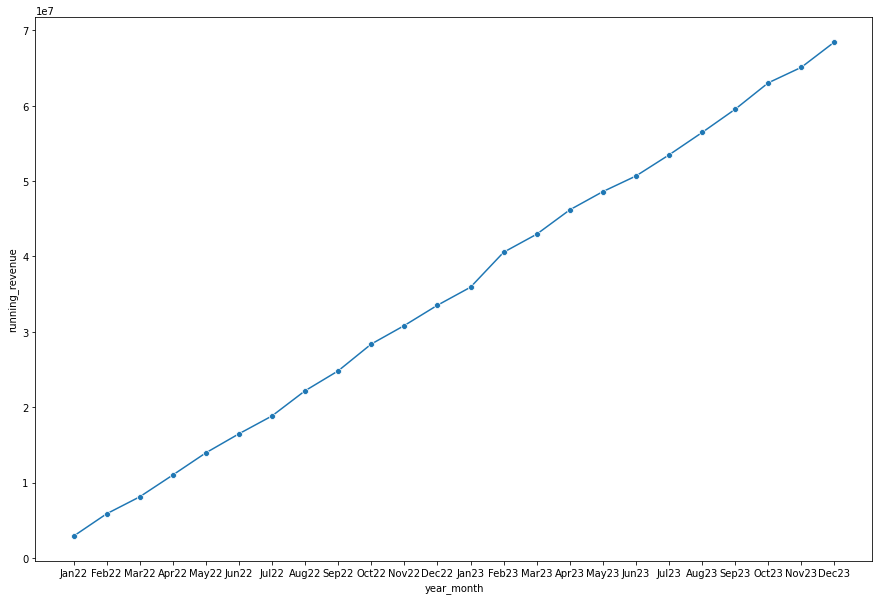

In [41]:
cdf['year_month']=cdf['order_month'].str[0:3]+cdf['order_year'].astype(str).str[2:4]
plt.figure(figsize=(15,10))
sns.lineplot(x='year_month', y='running_revenue', data=cdf,marker='o')

In [46]:
q="""select
	order_year,
	order_month_number,
	order_month,
	round(sum(total_revenue),2) current_sales,
	lag(round(sum(total_revenue),2)) over(order by order_year,order_month_number) prev_month_sales,
	round(sum(total_revenue),2)-lag(round(sum(total_revenue),2)) over(order by order_year,order_month_number) sales_diff,
	isnull((round(sum(total_revenue),2)-lag(round(sum(total_revenue),2)) over(order by order_year,order_month_number))*100
	/lag(round(sum(total_revenue),2)) over(order by order_year,order_month_number),0) mom_change,
	case
		when round(sum(total_revenue),2)-lag(round(sum(total_revenue),2)) over(order by order_year,order_month_number) > 0 then 'Sales Increment'
		when round(sum(total_revenue),2)-lag(round(sum(total_revenue),2)) over(order by order_year,order_month_number) <0 then 'Sales Decrement'
		else 'No Change'
    end 
from gold.fact_sales s
left join gold.dim_date d
on d.date_key=s.date_key
group by d.order_year,d.order_month_number,d.order_month
order by order_year, order_month_number"""

In [47]:
cdf = pd.read_sql(q, engine)
cdf

,order_year,order_month_number,order_month,current_sales,prev_month_sales,sales_diff,mom_change,
0,2022,1,January,"2,889,345.60",NaN,NaN,0.00,No Change
1,2022,2,February,"2,969,516.40","2,889,345.60","80,170.80",2.77,Sales Increment
2,2022,3,March,"2,251,831.80","2,969,516.40","-717,684.60",-24.17,Sales Decrement
3,2022,4,April,"2,891,542.70","2,251,831.80","639,710.90",28.41,Sales Increment
4,2022,5,May,"2,943,556.20","2,891,542.70","52,013.50",1.80,Sales Increment
5,2022,6,June,"2,525,245.20","2,943,556.20","-418,311.00",-14.21,Sales Decrement
6,2022,7,July,"2,371,625.70","2,525,245.20","-153,619.50",-6.08,Sales Decrement
7,2022,8,August,"3,338,972.70","2,371,625.70","967,347.00",40.79,Sales Increment
8,2022,9,September,"2,640,556.90","3,338,972.70","-698,415.80",-20.92,Sales Decrement
9,2022,10,October,"3,556,891.30","2,640,556.90","916,334.40",34.70,Sales Increment


<AxesSubplot:xlabel='year_month', ylabel='mom_change'>

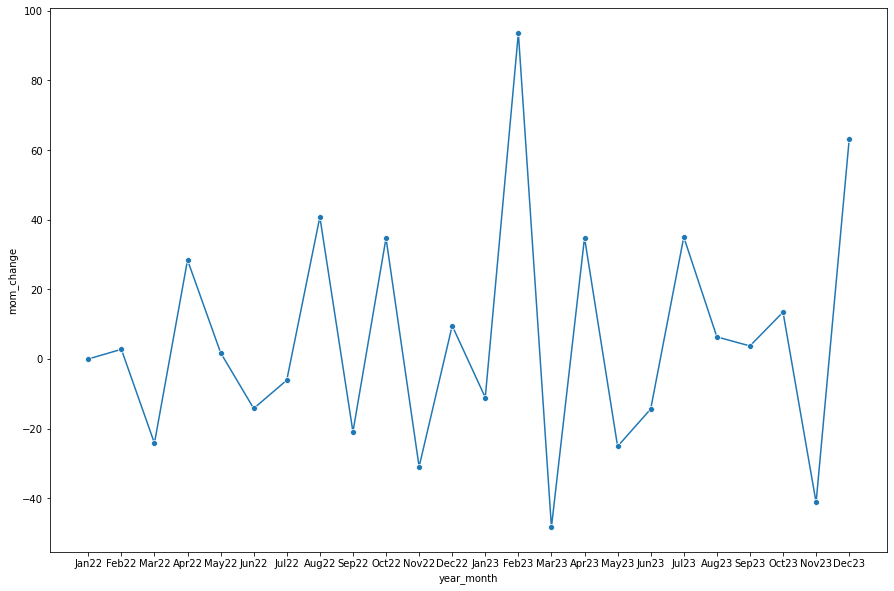

In [48]:
cdf['year_month']=cdf['order_month'].str[0:3]+cdf['order_year'].astype(str).str[2:4]
plt.figure(figsize=(15,10))
sns.lineplot(x='year_month', y='mom_change', data=cdf,marker='o')

In [51]:
q="""select
	p.category,
	p.sub_category,
	
	round(sum(s.total_revenue),2) total_revenue

from gold.fact_sales as s
left join gold.dim_products as p
on s.product_key=p.product_key
group by category, sub_category
order by category
"""
cdf = pd.read_sql(q, engine)
cdf

,category,sub_category,total_revenue
0,Furniture,Furnishings,"2,244,657.50"
1,Furniture,Chairs,"12,651,969.50"
2,Furniture,Bookcases,"3,596,807.40"
3,Furniture,Tables,"7,156,613.40"
4,Office Supplies,Art,"581,457.60"
5,Office Supplies,Paper,"2,084,683.40"
6,Office Supplies,Appliances,"2,794,595.00"
7,Office Supplies,Fasteners,"56,172.80"
8,Office Supplies,Envelopes,"325,632.90"
9,Office Supplies,Supplies,"950,735.70"


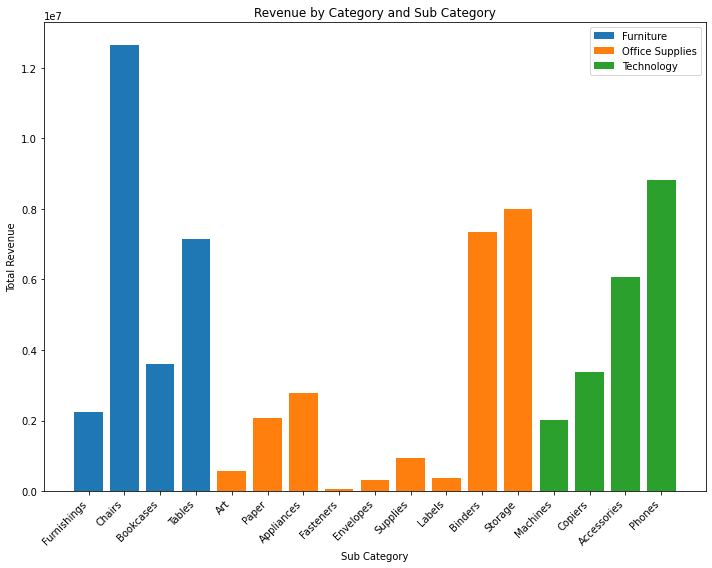

In [55]:
plt.figure(figsize=(10,8))

for category in cdf['category'].unique():
    subset = cdf[cdf['category'] == category]
    plt.bar(subset['sub_category'], subset['total_revenue'], label=category)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Sub Category')
plt.ylabel('Total Revenue')
plt.title('Revenue by Category and Sub Category')
plt.legend()
plt.tight_layout()
plt.show()


### PROFITABILITY ANALYSIS

In [56]:
q="""select
	profit_loss_flag,
	count(*) number_of_orders
from gold.fact_sales
group by profit_loss_flag"""
cdf = pd.read_sql(q, engine)
cdf

,profit_loss_flag,number_of_orders
0,Profit,32943
1,break even,1518
2,Loss,15578


([<matplotlib.patches.Wedge at 0x2300105b880>,
 [Text(-0.5249145442186555, 0.9666771546218114, 'Profit'),
  Text(-0.5085147880896141, -0.9754038703502129, 'break even'),
  Text(0.6145216260642401, -0.9123393946878335, 'Loss')],
 [Text(-0.28631702411926657, 0.5272784479755334, '65.8%'),
  Text(-0.2773717025943349, -0.5320384747364797, '3.0%'),
  Text(0.33519361421685817, -0.49763966982972735, '31.1%')])

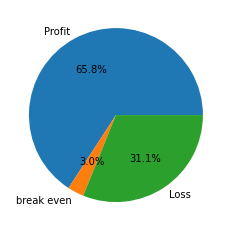

In [63]:
plt.pie(x=cdf['number_of_orders'],labels=cdf['profit_loss_flag'],autopct='%1.1f%%')

In [73]:
q="""select
	p.category,
	sum(s.total_revenue) total_revenue,
	sum(s.total_profit) total_profit,
	count(s.order_id) number_of_orders
from gold.fact_sales s
left join gold.dim_products p
on p.product_key=s.product_key
group by p.category"""
cdf = pd.read_sql(q, engine)
cdf['profit_per_order']=cdf['total_profit']/cdf['number_of_orders']
cdf

,category,total_revenue,total_profit,number_of_orders,profit_per_order
0,Office Supplies,"22,503,501.20","2,142,001.20",27559,77.72
1,Furniture,"25,650,047.80","2,348,447.80",12583,186.64
2,Technology,"20,293,622.90","1,936,342.90",9897,195.65


<AxesSubplot:xlabel='category', ylabel='profit_per_order'>

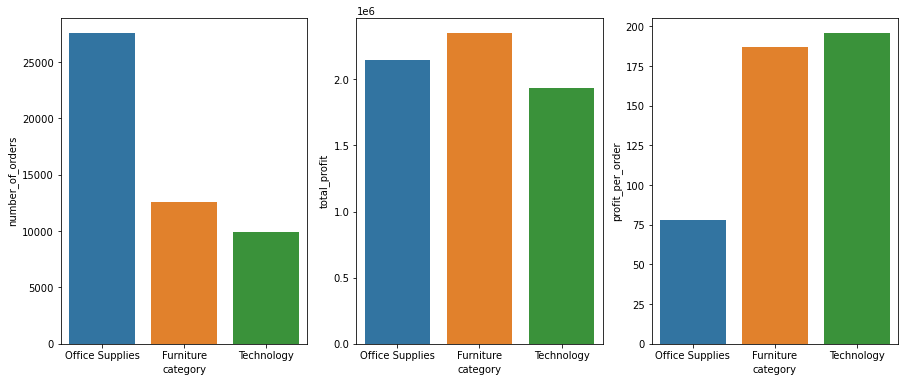

In [76]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
sns.barplot(x='category',y='total_profit',data=cdf,ax=axs[1])
sns.barplot(x='category',y='number_of_orders',data=cdf,ax=axs[0])
sns.barplot(x='category',y='profit_per_order',data=cdf,ax=axs[2])

In [78]:
q="""
select
    l.region,
    sum(f.total_profit) as profit,
    sum(f.total_revenue) as revenue
from gold.fact_sales f
join gold.dim_location l
    on f.location_key = l.location_key
group by l.region
order by profit desc;"""
cdf = pd.read_sql(q, engine)
cdf

,region,profit,revenue
0,West,"1,957,531.70","22,261,641.70"
1,East,"1,821,956.30","20,028,376.30"
2,Central,"1,502,596.30","14,970,986.30"
3,South,"1,144,707.60","11,186,167.60"


<AxesSubplot:xlabel='region', ylabel='profit'>

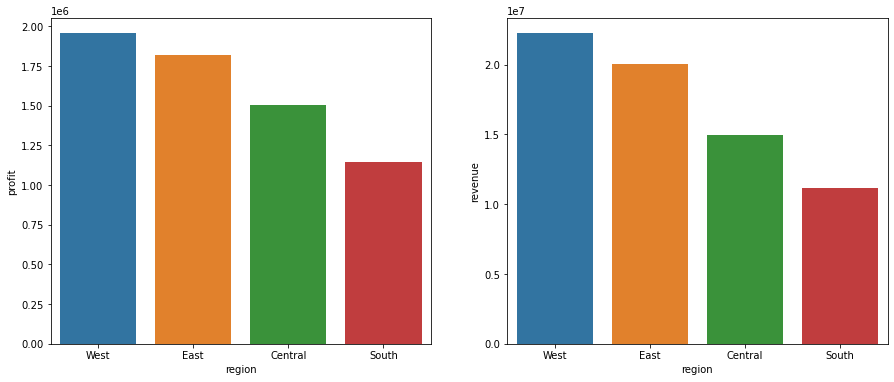

In [80]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
sns.barplot(x='region',y='revenue',data=cdf,ax=axs[1])
sns.barplot(x='region',y='profit',data=cdf,ax=axs[0])